# **Heart Disease Prediction**

---
In today's fast paced world due to increase in stress and several other factors, we are seeing an increase in cardiovascular diseases. But if timely diagnosis is made, several lives can be saved.
In this project we would be predicting if a person has heart disease or not using various Supervised machine learning models. This is a classification problem, since based on some features we need to classify if there is presence or absence of heart disease. The target in this case will have two categories, 0 to indicate the absence of heart disease and 1 to indicate the presence of heart disease.

---
We will try to do the classification using Supervised Learning Models like Logistic Regression, KNN, Ada Boost and Random Forest Classifier. Based on the Accuracy and Precision we get from these models we can decide which model performs the best in detecting the presence or absence of heart disease.


For this project 'Heart Disease' data from UC Irvine Machine Learning Repository has been used. Link for the dataset: https://archive.ics.uci.edu/dataset/45/heart+disease
The dataset has 303 samples and 13 features. There are 7 categorical features and 6 numerical features. The target variable is an integer valued from 0 (no presence) to 4. For the purpose of this project we need to predict if a person has heart disease or not so we will use 0 to indicate the absence of heart disease and 1 to indicate the presence of heart disease. We will convert the values of Y to indicate this.\
**Data Description:**\
**age**	*Feature	Integer*:	age in years\
**sex**	*Feature	Categorical*:	sex (1 = male; 0 = female)
\
**cp**	*Feature	Categorical*:	chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
\
**trestbps**	*Feature	Integer*:		resting blood pressure (on admission to the hospital) in	mm Hg\
**chol**	*Feature	Integer*:		serum cholestoral	in mg/dl\
**fbs**	*Feature	Categorical*:		fasting blood sugar > 120 mg/dl  (1 = true; 0 = false)
\
**restecg**	*Feature	Categorical*: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
\
**thalach**	*Feature	Integer*:maximum heart rate achieved\
**exang**	*Feature	Categorical*: exercise induced angina	 (1 = yes; 0 = no)
\
**oldpeak**	*Feature	Integer*:	ST depression induced by exercise relative to rest\
**slope**	*Feature	Categorical*: the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
\
**ca**	*Feature	Integer*:		number of major vessels (0-3) colored by flourosopy\
**thal**	*Feature	Categorical*: 3 = normal; 6 = fixed defect; 7 = reversable defect
\
**num**	*Target	Integer*:		diagnosis of heart disease (0=absence of heart disease and 1=presence of heart disease)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

In [2]:
pip install ucimlrepo

In [3]:
# fetch dataset
from ucimlrepo import fetch_ucirepo
heart_disease = fetch_ucirepo(id=45)
df = heart_disease.data

# data (as pandas dataframes)
X = heart_disease.data.features
Y = heart_disease.data.targets

In [4]:
# Check the data types of features
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB
None


From the above table we see that the datatype of some of the columns is not correct. So, first we will fix this. We see that the datatype of some categorical features like thal, slope, exang, restecg, fbs, cp, sex are not correct.

In [62]:
# Converting 'thal' from float64 to Category datatype
X['thal']=X['thal'].astype('category')
# Converting 'slope' from int64 to Category datatype
X['slope']=X['slope'].astype('category')
# Converting 'exang' from int64 to Category datatype
X['exang']=X['exang'].astype('category')
# Converting 'restecg' from int64 to Category datatype
X['restecg']=X['restecg'].astype('category')
# Converting 'fbs' from int64 to Category datatype
X['fbs']=X['fbs'].astype('category')
# Converting 'cp' from int64 to Category datatype
X['cp']=X['cp'].astype('category')
# Converting 'sex' from int64 to Category datatype
X['sex']=X['sex'].astype('category')


After fixing the datatype of features, let us check if there are any missing values in our data.

In [6]:
# Check if there are any missing values in our data
print(X.info())
X.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trestbps  303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalach   303 non-null    int64   
 8   exang     303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slope     303 non-null    category
 11  ca        299 non-null    float64 
 12  thal      301 non-null    category
dtypes: category(7), float64(2), int64(4)
memory usage: 17.3 KB
None


,age,trestbps,chol,thalach,oldpeak,ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,54.438944,131.689769,246.693069,149.607261,1.039604,0.672241
std,9.038662,17.599748,51.776918,22.875003,1.161075,0.937438
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,133.500000,0.000000,0.000000
50%,56.000000,130.000000,241.000000,153.000000,0.800000,0.000000
75%,61.000000,140.000000,275.000000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000


We see that there are few missing values for 'ca' and 'thal' features. 'ca' column has 4 missing values and 'thal' column has 2 missing values.




In [7]:
# Find the rows that have missing values for 'ca' feature
X[X['ca'].isna()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
166,52,1,3,138,223,0,0,169,0,0.0,1,NaN,3.0
192,43,1,4,132,247,1,2,143,1,0.1,2,NaN,7.0
287,58,1,2,125,220,0,0,144,0,0.4,2,NaN,7.0
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0


'ca' is the number of major vessels (0-3) colored by flourosopy. We will fill in the missing values of 'ca' by its mean value.

In [8]:
# Filling missing values of 'ca' by mean value
X.at[166,'ca']=0.672241
X.at[192,'ca']=0.672241
X.at[287,'ca']=0.672241
X.at[302,'ca']=0.672241
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trestbps  303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalach   303 non-null    int64   
 8   exang     303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slope     303 non-null    category
 11  ca        303 non-null    float64 
 12  thal      301 non-null    category
dtypes: category(7), float64(2), int64(4)
memory usage: 17.3 KB
None


Now lets find the rows that have missing 'thal' value.

In [9]:
# Find the rows that have missing values for 'thal' feature
X[X['thal'].isna()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
87,53,0,3,128,216,0,2,115,0,0.0,1,0.0,NaN
266,52,1,4,128,204,1,0,156,1,1.0,2,0.0,NaN


For 'thal': 3 = normal; 6 = fixed defect; 7 = reversable defect. Since there are only two rows missing this value and we don't know the exact category of this important feature we can delete these two rows.

In [10]:
X = X.drop([87,266])

Now let us check if we still have null values.

In [11]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       301 non-null    int64   
 1   sex       301 non-null    category
 2   cp        301 non-null    category
 3   trestbps  301 non-null    int64   
 4   chol      301 non-null    int64   
 5   fbs       301 non-null    category
 6   restecg   301 non-null    category
 7   thalach   301 non-null    int64   
 8   exang     301 non-null    category
 9   oldpeak   301 non-null    float64 
 10  slope     301 non-null    category
 11  ca        301 non-null    float64 
 12  thal      301 non-null    category
dtypes: category(7), float64(2), int64(4)
memory usage: 19.5 KB
None


We see that there are no null values in any column(feature) of X.

Now let us look into Y.

In [12]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   num     303 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB


Y currently has 303 rows. Since we deleted rows 87 and 266 in X we need to delete these two rows in Y also.

In [13]:
Y = Y.drop([87,266])
Y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 0 to 302
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   num     301 non-null    int64
dtypes: int64(1)
memory usage: 4.7 KB


array([[<Axes: title={'center': 'num'}>]], dtype=object)

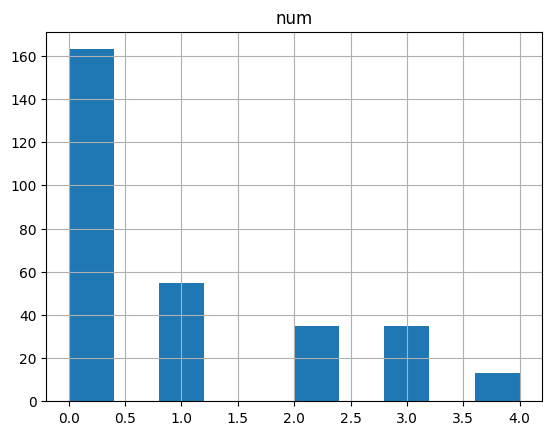

In [14]:
Y.hist()

From the above histogram we see that Y has values 0, 1, 2, 3 or 4.

*   0 means no heart disease and 1, 2, 3 or 4 indicate the presence of heart disease.
*  So, we can simply have 0 to indicate no heart disease and 1 to indicate the presence of heart disease.



  

array([[<Axes: title={'center': 'num'}>]], dtype=object)

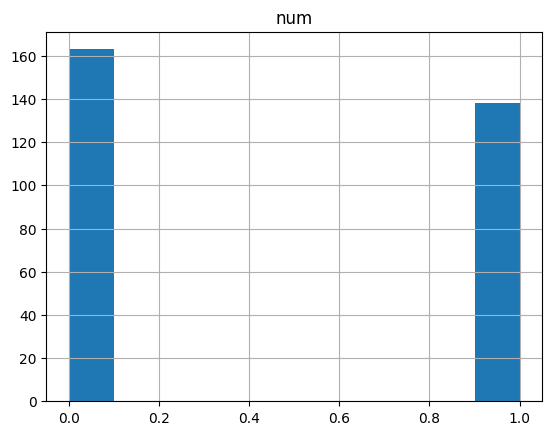

In [15]:
Y[Y==2]=1
Y[Y==3]=1
Y[Y==4]=1
Y.hist()

Thus, we see that Y now has only two values either 0 (no heart disease) or 1 (presence of heart disease).

---



Now let us check if all our features have valid values. First we can check for categorical features. We have 7 categorical features.

*   sex: sex (1 = male; 0 = female)
*   cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
*   fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
*   restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria


*   exang: exercise induced angina (1 = yes; 0 = no)
*   slope: the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
*   thal: 3 = normal; 6 = fixed defect; 7 = reversable defect












<Axes: >

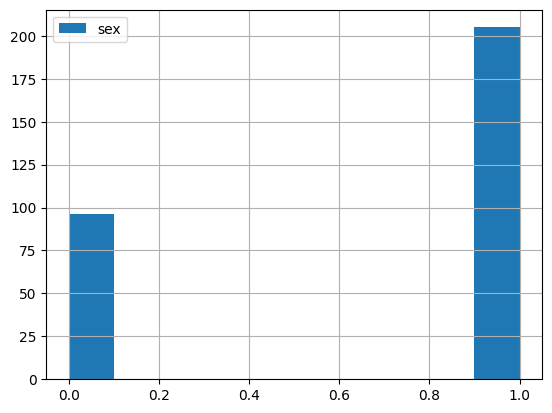

In [16]:
X['sex'].hist(legend='True')

<Axes: >

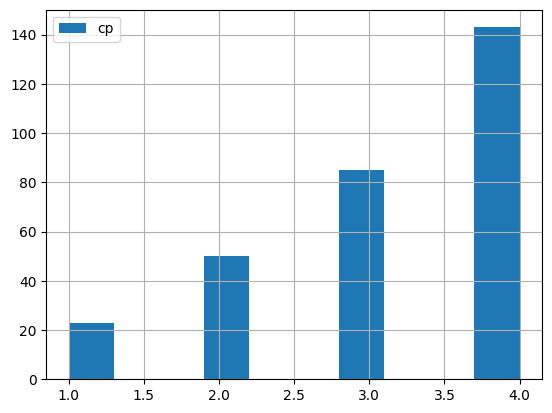

In [17]:
X['cp'].hist(legend='True')

<Axes: >

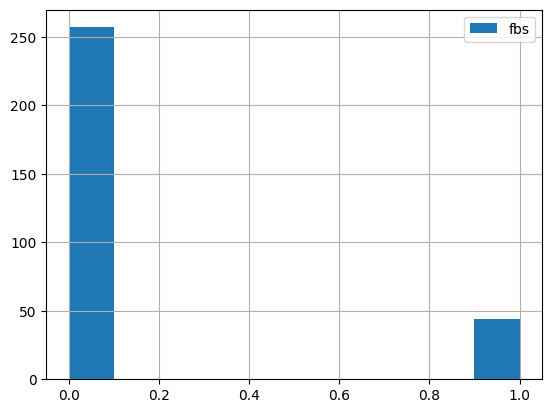

In [18]:
X['fbs'].hist(legend='True')

<Axes: >

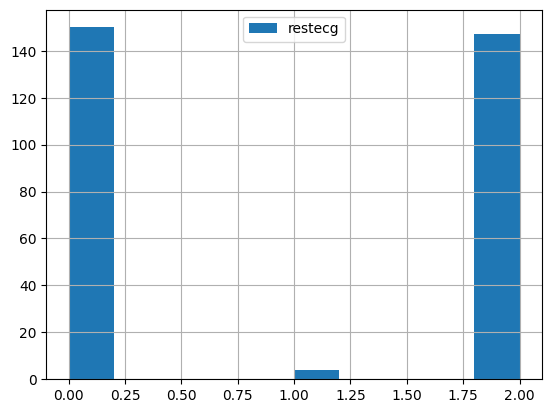

In [19]:
X['restecg'].hist(legend='True')

<Axes: >

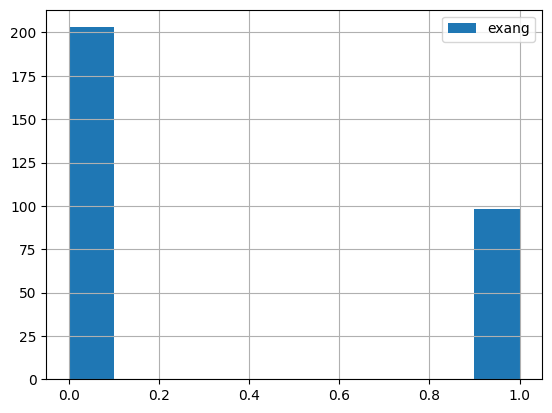

In [20]:
X['exang'].hist(legend='True')

<Axes: >

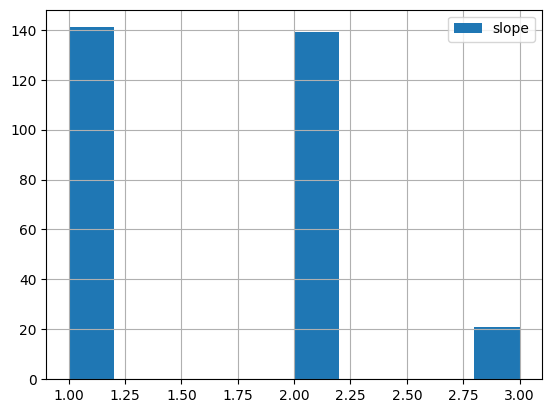

In [21]:
X['slope'].hist(legend='True')

<Axes: >

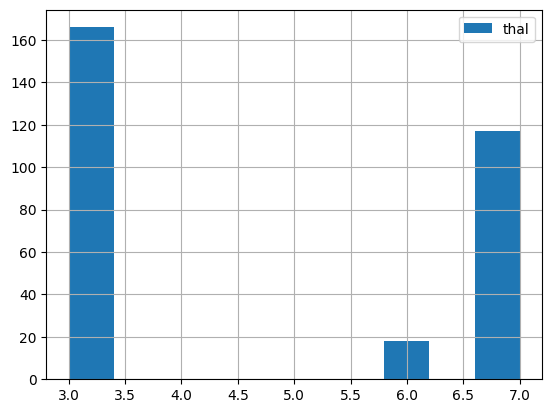

In [22]:
X['thal'].hist(legend='True')

From the histograms above for categorical features we see that all the values look correct.

---
Now let us check for validity of numerical features. There are 6 numerical features.


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'trestbps'}>,
        <Axes: title={'center': 'chol'}>],
       [<Axes: title={'center': 'thalach'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'ca'}>]], dtype=object)

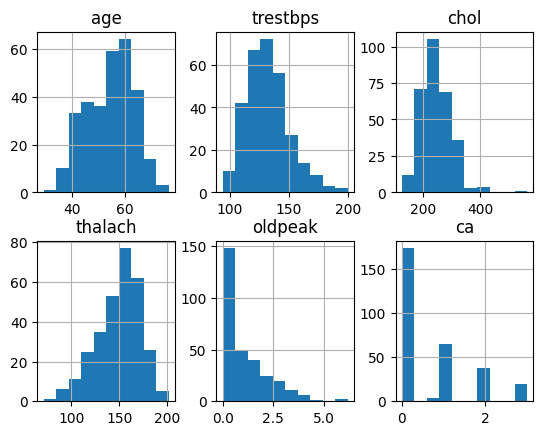

In [23]:
X.hist(layout=(2,3))

From the histograms above, the values of the numerical features in X look correct.

In [24]:
# Finding correlation
X.corr()

<ipython-input-24-b9b83e6766d0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  X.corr()


,age,trestbps,chol,thalach,oldpeak,ca
age,1.000000,0.284734,0.208287,-0.395982,0.203604,0.359140
trestbps,0.284734,1.000000,0.129371,-0.046402,0.188801,0.097883
chol,0.208287,0.129371,1.000000,-0.005690,0.044836,0.115513
thalach,-0.395982,-0.046402,-0.005690,1.000000,-0.349391,-0.267894
oldpeak,0.203604,0.188801,0.044836,-0.349391,1.000000,0.293222
ca,0.359140,0.097883,0.115513,-0.267894,0.293222,1.000000


From the correlation table we see that none of the features are highly correlated. So, we will consider all the features.

---

Now, let us split our data into training and test sets.

In [25]:
# We use train_test_split from sklearn to split our data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [26]:
# To check if the data is split properly
print("Shape of X_train",X_train.shape)
print("Shape of X_test",X_test.shape)
print("Shape of Y_train",Y_train.shape)
print("Shape of Y_test",Y_test.shape)

Shape of X_train (240, 13)
Shape of X_test (61, 13)
Shape of Y_train (240, 1)
Shape of Y_test (61, 1)


Thus, we see that the data is split correctly, with 20% data as test data and 80% data as training data.

**Logistic Regression**

In [27]:
# Creating the classifier model and fitting the data
clf = LogisticRegression(class_weight="balanced",solver="liblinear",random_state=0)
clf.fit(X_train,np.array(Y_train).flatten())

LogisticRegression(class_weight='balanced', random_state=0, solver='liblinear')

In [28]:
# Predicted value of X_test
pred = clf.predict(X_test)
pred

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0])

In [29]:
# True value of Y_test
true = np.array(Y_test).flatten()
true

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0])

In [30]:
# Calculating the accuracy of the model on test set
LRaccuracy = clf.score(X_test,Y_test)
LRaccuracy

0.8852459016393442

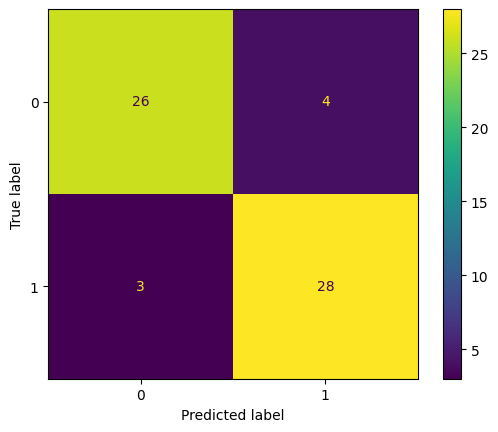

In [31]:
# Confusion Matrix
cm = confusion_matrix(true,pred,labels=clf.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

In [32]:
# Calculating the precision of the model on test set
LRprecision = precision_score(true,pred)
LRprecision

0.875

In [33]:
# Calculating the recall of the model on test set
LRrecall = recall_score(true,pred)
LRrecall

0.9032258064516129

Using logistic regression we were able to get approximately 88.52% accuracy, 87.5% precision and 90.32% recall on the test data.

**KNN Implementation**

---
Let us now try to predict the presence or absence of heart disease using KNN (K-nearest Neighbors)



In [34]:
# Create a classifier with 3 neighbors
clf = KNeighborsClassifier(n_neighbors=3)
# Fit the training data to the classifier
clf.fit(X_train,np.array(Y_train).flatten())

KNeighborsClassifier(n_neighbors=3)

Now we can use KNN classifier to predict the values of X_test

In [35]:
# Predicting the values for X_test
pred = clf.predict(X_test)
pred

array([1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0])

In [36]:
# True value of Y_test
true = np.array(Y_test).flatten()
true

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0])

Let us check the accuracy of this model.

In [37]:
# Calculating the accuracy of the model on test set
accuracy = clf.score(X_test,Y_test)
accuracy

0.6229508196721312

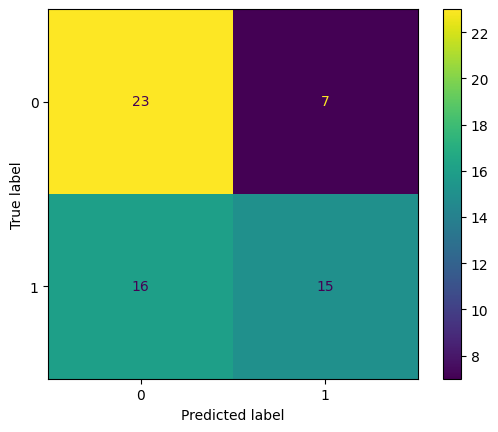

In [38]:
# Confusion Matrix
cm = confusion_matrix(true,pred,labels=clf.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

This model with K=3 is approximately 62.295% accurate.

So, let us try to calculate the accuracy when K=5





In [39]:
# Create a classifier with 5 neighbors
clf = KNeighborsClassifier(n_neighbors=5)
# Fit the training data to the classifier
clf.fit(X_train,np.array(Y_train).flatten())

KNeighborsClassifier()

In [40]:
# Predicting the values for X_test
pred = clf.predict(X_test)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0])

In [41]:
# True value of Y_test
true = np.array(Y_test).flatten()
true

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0])

In [42]:
# Calculating the accuracy of the model on test set
KNNaccuracy = clf.score(X_test,Y_test)
KNNaccuracy

0.7049180327868853

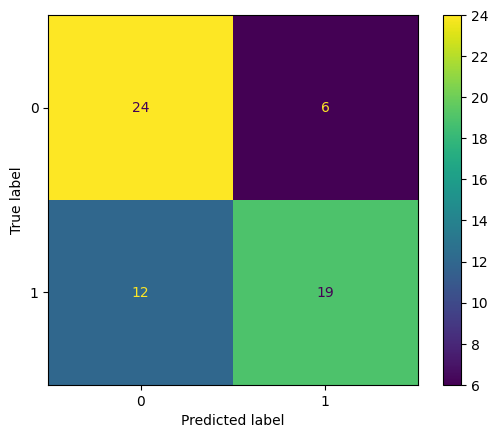

In [43]:
# Confusion Matrix
cm = confusion_matrix(true,pred,labels=clf.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

In [44]:
# Calculating the precision of the model on test set
KNNprecision = precision_score(true,pred)
KNNprecision

0.76

In [45]:
# Calculating the recall of the model on test set
KNNrecall = recall_score(true,pred)
KNNrecall

0.6129032258064516

This model with K=5 is approximately 70.5% accurate and 76% precise in predicting the presence or absence of heart disease in the test data. For K>5 the accuracy decreases. So, the best accuracy that we could get with KNN model is 70.5% at K=5

**Random Forest Implementation**


---
Now let us try to predict the presence or absence of heart disease using Random Forest Classifier.


In [46]:
# Creating the classifier model and fitting the data
clf = RandomForestClassifier(n_estimators=200,random_state=0)
clf.fit(X_train,np.array(Y_train).flatten())

RandomForestClassifier(n_estimators=200, random_state=0)

In [47]:
# Predicted value of X_test
pred = clf.predict(X_test)
pred

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0])

In [48]:
# True value of Y_test
true = np.array(Y_test).flatten()
true

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0])

In [49]:
# Calculating the accuracy of the model on test set
RFaccuracy = clf.score(X_test,Y_test)
RFaccuracy

0.8524590163934426

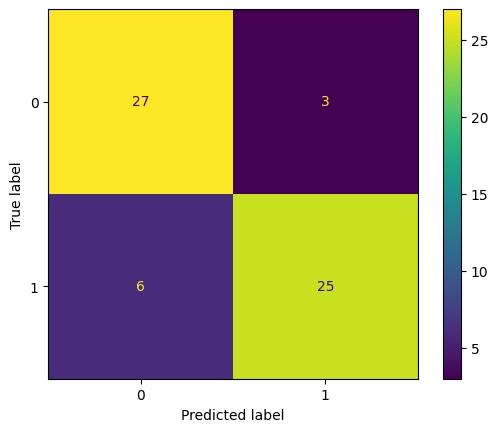

In [50]:
# Confusion Matrix
cm = confusion_matrix(true,pred,labels=clf.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

In [51]:
# Calculating the precision of the model on test set
RFprecision = precision_score(true,pred)
RFprecision

0.8928571428571429

In [52]:
# Calculating the recall of the model on test set
RFrecall = recall_score(true,pred)
RFrecall

0.8064516129032258

Thus, we see that Random Forest Classifier is approximately 85.25% accurate, 89.29% precise and has recall of 80.65% in predicting the presence or absence of heart disease in the test data.

**Ada Boost Classifier**

In [53]:
# Creating the classifier model and fitting the data
clf = AdaBoostClassifier(random_state=0)
clf.fit(X_train,np.array(Y_train).flatten())

AdaBoostClassifier(random_state=0)

In [54]:
# Predicted value of X_test
pred = clf.predict(X_test)
pred

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0])

In [55]:
# True value of Y_test
true = np.array(Y_test).flatten()
true

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0])

In [56]:
# Calculating the accuracy of the model on test set
ABaccuracy = clf.score(X_test,Y_test)
ABaccuracy

0.8524590163934426

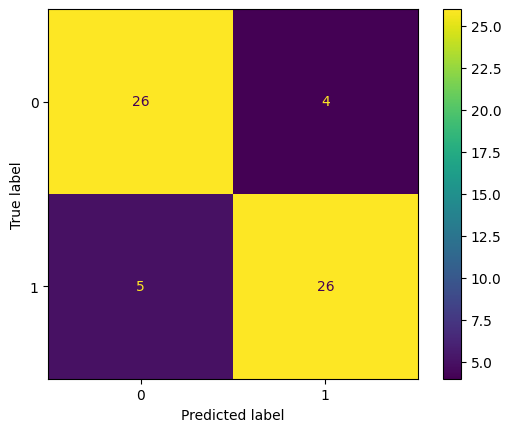

In [57]:
# Confusion Matrix
cm = confusion_matrix(true,pred,labels=clf.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

In [58]:
# Calculating the precision of the model on test set
ABprecision = precision_score(true,pred)
ABprecision

0.8666666666666667

In [59]:
# Calculating the recall of the model on test set
ABrecall = recall_score(true,pred)
ABrecall

0.8387096774193549

Thus, we see that the Ada Boost classifier is approximately 85.25% accurate, 86.67% precise and has recall of 83.87% in predicting the presence or absence of heart disease in the test data.

In [60]:
A=[LRaccuracy,KNNaccuracy,RFaccuracy,ABaccuracy]
P=[LRprecision,KNNprecision,RFprecision,ABprecision]
R=[LRrecall,KNNrecall,RFrecall,ABrecall]
N=['LogisticRegression','KNN','RandomForest','AdaBoost']

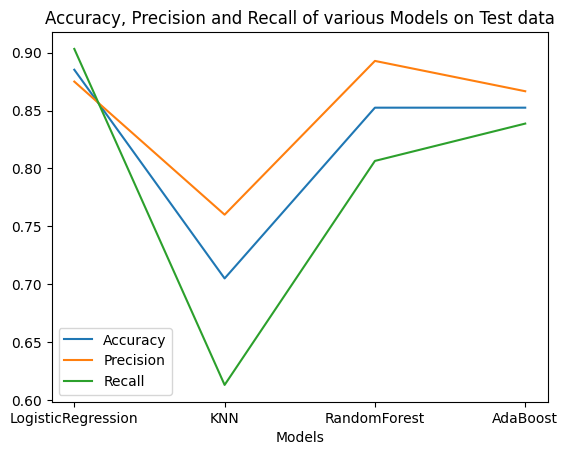

In [61]:
plt.plot(N,A,label='Accuracy')
plt.plot(N,P,label='Precision')
plt.plot(N,R,label='Recall')
plt.title("Accuracy, Precision and Recall of various Models on Test data")
plt.xlabel("Models")
plt.legend()

*   From the above accuracy plot we see that Logistic Regression model gives the highest accuracy on the test data i.e. 88.52%.
*   From the above precision plot we see that Random Forest Classifier gives us the highest precision i.e. 89.29%.
*   From the above recall plot we see that Logistic Regression gives us highest recall value i.e. 90.32%
*  We need to consider recall value in heart disease prediction because we want to capture as many positive cases as possible. We do not want false negatives, as we do not want a person who has heart disease to be predicted as having no heart disease, this could lead to dangerous consequences.
*   We see that KNN does not perform that well compared to other models.
*   Logistic Regression has perform good in all three performance metrics.
*   In future maybe we can try to further improve the performance metrics by trying other hyperparameters. We can try to use other models.








